Mariana Valenzuela Lafarga

15 de abril del 2024

# Repaso - Módulo 2
---

## Cifrado

Se recibió un mensaje cifrado con un método congruencial simple: $ x_n = (ax_{n-1}+b)\mod m $.

El cifrado que se usó es el siguiente:
- 0 corresponde a 'A'
- 1 corresponde a 'B'
- 2 corresponde a 'C'
- ...
- 25 corresponde a 'Z' (no hay 'Ñ')
- Se toma la letra y se le suma un número aleatorio desconocido.
- Se generan 3 números antes de empezar el cifrado; esto quiere decir que la primera letra es "Letra + $x_3$"
- El mensaje que llegó fue: "15, 25, 21, 5"

Sabiendo de antemano que los parámetros de este generador son $m=16$, $a=5$, $b=3$ y que la semilla fue $7$; ¿cuál es el mensaje decodificado?

In [4]:
import numpy as np
n=6
m=16
a=5
b= 3
x=7

lista = []
for i in range (1,7):
    x =(a*x +b) % m 
    lista.append(x)
lista


[6, 1, 8, 11, 10, 5]

In [13]:
array=np.array(lista)
array=array[2:]
array

array([ 8, 11, 10,  5])

In [9]:
codigo=np.array([15,25,21,5])
codigo

array([15, 25, 21,  5])

In [15]:
mensaje=codigo-array
mensaje

array([ 7, 14, 11,  0])

El mensaje es "HOLA"


## Evaluación numérica de integrales utilizando Montecarlo
Escriba la función para integrar por el método Montecarlo de tipo 1

In [16]:
def montecarlo(f,a,b,N):
    u= np.random.uniform(a,b,N)
    y= f(u)
    return np.mean(y)*(b-a)

Considere las funciones $f_1(x)=\sqrt{1+x^{4}}$, $f_2(x)=\ln(\ln x)$, $f_3(x)=\frac {1}{\ln x}$, y $f_4(x)=e^{-{\frac {x^{2}}{2}}}$.

Utilizar la función anterior para realizar la evaluación numérica de las integrales de las funciones anteriores en el intervalo $(4,5)$. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.

In [23]:
import numpy as np
import pandas as pd
a=4
b=5
N= [10,100,1000,10000,100000]
tabla= pd.DataFrame(columns=["F1", "Error1", "F2", "Error2", "F3", "Error3","F4","Error4"],index= N)
tabla

,F1,Error1,F2,Error2,F3,Error3,F4,Error4
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
def f1(x):
    return np.sqrt(1+x**4)

def f2(x):
    return np.log(np.log(x))
def f3(x):
    return 1/(np.log(x))
def f4(x):
    return np.exp(-x**2/2)

In [35]:
for n in N:
    tabla.loc[n,"F1"]=montecarlo(f1,a,b,n)
    tabla.loc[n,"Error1"]=np.abs( 20.3583 -tabla.loc[n,"F1"])
    tabla.loc[n,"F2"]=montecarlo(f2,a,b,n)
    tabla.loc[n,"Error2"]=np.abs( 0.405885 -tabla.loc[n,"F2"])
    tabla.loc[n,"F3"]=montecarlo(f3,a,b,n)
    tabla.loc[n,"Error3"]=np.abs( 0.667003 -tabla.loc[n,"F3"])
    tabla.loc[n,"F4"]=montecarlo(f4,a,b,n)
    tabla.loc[n,"Error4"]=np.abs( 0.0000786695 -tabla.loc[n,"F4"])
    
tabla

,F1,Error1,F2,Error2,F3,Error3,F4,Error4
10,18.343879,2.014421,0.398112,0.007773,0.658521,0.008482,0.000034,0.000045
100,20.548801,0.190501,0.400651,0.005234,0.669971,0.002968,0.000072,0.000007
1000,20.162641,0.195659,0.407001,0.001116,0.667254,0.000251,0.00008,0.000002
10000,20.366416,0.008116,0.405605,0.00028,0.667031,0.000028,0.000077,0.000001
100000,20.346272,0.012028,0.405996,0.000111,0.666993,0.00001,0.000079,0.000001


## Montecarlo Tipo 2
Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error de integración.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y grafíque esta región.

In [36]:
def montecarlo2(region, ax,bx,ay,by,N):
    X= np.random.uniform(ax,bx,N)
    Y= np.random.uniform(ay,by,N)
    return np.mean(region(X,Y))*((by-ay)*(bx-ax))

In [37]:
def bernoulli(x,y):
    return x**2 + 2*y**2 <= -2*x + 8*y -7

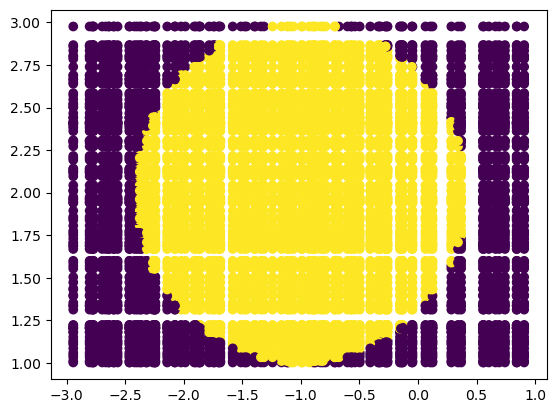

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
N = 100
ax = -3
bx = 1
ay = 1
by = 3
X= np.random.uniform(ax,bx,N)
Y= np.random.uniform(ay,by,N)

X, Y = np.meshgrid(X, Y)
plt.figure()
plt.scatter(X, Y, c=bernoulli(X, Y))


In [50]:
N=[10,100,1000,10000,100000]
tabla= pd.DataFrame(columns=["Area","Error"],index= N)
tabla

,Area,Error
10,NaN,NaN
100,NaN,NaN
1000,NaN,NaN
10000,NaN,NaN
100000,NaN,NaN


In [51]:
for n in N:
    tabla.loc[n,"Area"]= montecarlo2(bernoulli,ax,bx,ay,by,n)
tabla

,Area,Error
10,4.8,NaN
100,3.68,NaN
1000,4.536,NaN
10000,4.4944,NaN
100000,4.41976,NaN


---
## Fractal aleatorio tipo Barnsley

- En la clase de fractales aleatorios vimos que el fractal helecho de Barnsley se generaba a través de cuatro transformaciones afines que se elegían con cierta probabilidad.
- Vimos que este helecho representaba de manera muy aproximada helechos reales.
- Vimos que modificando parámetros de la tabla, se podían generar mutaciones de el helecho.

Pues bien, usando la misma idea de transformaciones afines que se escogen con cierta probabilidad, se pueden generar una infinidad inimaginable de fractales. Incluso, se pueden generar fractales aleatorios que poseen un atractor determinístico.

**Referencia:**
- Barnsley, Michael F. *Fractals Everywhere: New Edition*, ISBN: 9780486320342.

Usando la siguiente tabla, evalúe el fractal de Barnsley para 100 000 puntos.

In [52]:
import pandas as pd
import numpy as np

In [53]:
i = np.arange(4)

df = pd.DataFrame(index=i,columns=['$a_i$', '$b_i$', '$c_i$', '$d_i$', '$e_i$', '$f_i$', '$p_i$'], dtype='float')
df.index.name = "$i$"

df['$a_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$b_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$c_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$d_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$e_i$'] = [1.0, 50.0, 1.0, 50.0]
df['$f_i$'] = [1.0, 1.0, 50.0, 50.0]
df['$p_i$'] = [0.1, 0.2, 0.3, 0.4]

df.round(2)

,$a_i$,$b_i$,$c_i$,$d_i$,$e_i$,$f_i$,$p_i$
$i$,,,,,,,
0,0.5,0.0,0.0,0.5,1.0,1.0,0.1
1,0.5,0.0,0.0,0.5,50.0,1.0,0.2
2,0.5,0.0,0.0,0.5,1.0,50.0,0.3
3,0.5,0.0,0.0,0.5,50.0,50.0,0.4


In [54]:
decisiones= ["0", "1", "2", "3"]
probabilidad=[0.1,0.2,0.3,0.4]
x=[0]
y=[0]

for k in range(10**5):
    decision=np.random.choice(decisiones,p=probabilidad)
    if decision== "0":
        a,b,c,d,e,f=0.5,0,0,0.5,1,1
    elif decision== "1":
        a,b,c,d,e,f= 0.5,0,0,0.5,50,1
    elif decision== "2":
        a,b,c,d,e,f= 0.5,0,0,0.5,1,50
    else:
        a,b,c,d,e,f= 0.5,0,0,0.5,50,0.4
        
    xkp1= a*x[-1]+ b*y[-1]+e
    ykp1= c*x[-1] + d*y[-1]+ f
    
    x.append(xkp1)
    y.append(ykp1)

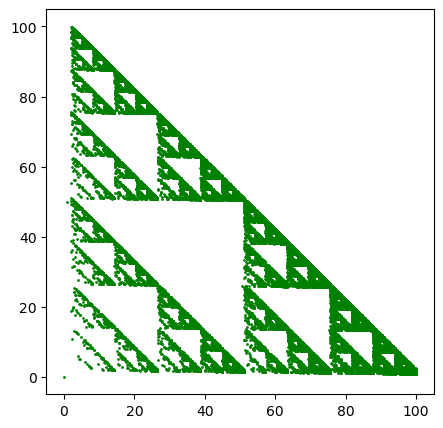

In [57]:
plt.figure(figsize=(5,5))
plt.scatter(x,y,s=1,c="g")

---
## Probabilidad Precio-Umbral

En las últimas clases vimos una aplicación de simulación montecarlo. Consistía en descargar datos históricos de precio de cierre de acciones de alguna compañía, proyectar esos precios y sacar la probabilidad de que los precios en el siguiente año sobrepasaran cierto precio umbral.

En este ejemplo evaluaremos dos compañías con tendencias más o menos similares (Apple y Microsoft) veremos cuál tiene más probabilidades de darnos un interés deseado.

Además, descargaremos los datos del año 2020 para ver si el análisis concuerda.

Descargue datos para Apple y Microsoft desde enero de 2015 a diciembre de 2019 y muestre sus gráficas.

In [58]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [59]:
def get_close(names,start,end):
    return yf.download(names,start=start,end=end)[["Adj Close"]]

In [67]:
names=["AAPL","MSFT"]
activos= get_close(names,"2015-01-01","2019-12-31")
activos

[*********************100%***********************]  2 of 2 completed


Adj Close            
                                AAPL        MSFT
Date                                            
2015-01-02 00:00:00-05:00  24.435268   40.378071
2015-01-05 00:00:00-05:00  23.746887   40.006752
2015-01-06 00:00:00-05:00  23.749123   39.419571
2015-01-07 00:00:00-05:00  24.082140   39.920406
2015-01-08 00:00:00-05:00  25.007431   41.094795
...                              ...         ...
2019-12-23 00:00:00-05:00  69.082329  151.406265
2019-12-24 00:00:00-05:00  69.148018  151.377426
2019-12-26 00:00:00-05:00  70.519913  152.618225
2019-12-27 00:00:00-05:00  70.493156  152.897156
2019-12-30 00:00:00-05:00  70.911545  151.579407

[1257 rows x 2 columns]

array([[<AxesSubplot:title={'center':"('Adj Close', 'AAPL')"}>,
        <AxesSubplot:title={'center':"('Adj Close', 'MSFT')"}>]],
      dtype=object)

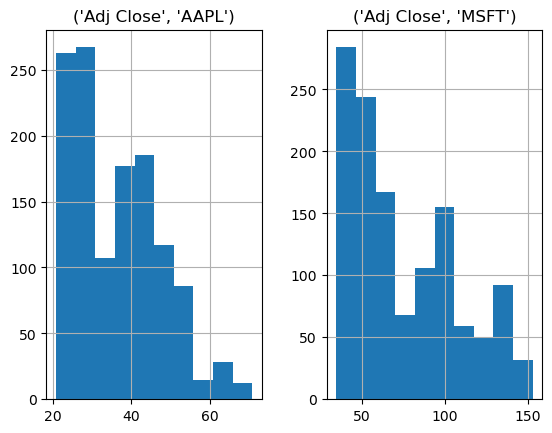

In [68]:
activos.hist()

Calcule los rendimientos diarios junto con sus características estadísticas

In [70]:
ret = activos.pct_change().dropna()
ret.head()

Adj Close          
                               AAPL      MSFT
Date                                         
2015-01-05 00:00:00-05:00 -0.028172 -0.009196
2015-01-06 00:00:00-05:00  0.000094 -0.014677
2015-01-07 00:00:00-05:00  0.014022  0.012705
2015-01-08 00:00:00-05:00  0.038422  0.029418
2015-01-09 00:00:00-05:00  0.001072 -0.008405

In [73]:
describe=ret.describe()
describe

Adj Close             
              AAPL         MSFT
count  1256.000000  1256.000000
mean      0.000971     0.001161
std       0.015651     0.014692
min      -0.099607    -0.092533
25%      -0.005857    -0.005404
50%       0.000892     0.000890
75%       0.008924     0.008058
max       0.070422     0.104522

In [80]:
aaplmean=ret["Adj Close"]["AAPL"].mean()
aaplmean

0.0009712763750965982

In [81]:
aaplstd=ret["Adj Close"]["AAPL"].std()
aaplstd

0.0156512953551726

In [83]:
msftmean=ret["Adj Close"]["MSFT"].mean()
msftmean

0.0011612733101915781

In [84]:
msftstd=ret["Adj Close"]["MSFT"].std()
msftstd

0.014691668523491333

Simule 1000 escenarios de rendimientos diarios para el 2020 (para cada una de las empresas)

In [72]:
def simR(media,std,start,dias,N):
    sim_R= np.random.normal(media,std,size=(dias,N))+1
    fechas= pd.date_range(start,periods=dias)
    return pd.DataFrame(sim_R,index=fechas)

In [85]:
simR_aapl= simR(aaplmean,aaplstd,"2020-01-01",365,1000)
simR_aapl

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-01-01,0.998067,0.992318,0.995133,1.016449,0.998517,1.020272,0.985438,0.981145,1.013775,1.001674,...,0.989972,1.011130,1.009851,0.978959,1.022542,1.009424,0.999375,0.990366,1.001560,0.980688
2020-01-02,1.000095,0.991425,0.986652,0.999022,0.986531,1.001097,1.022705,0.999676,0.954331,0.992675,...,0.999148,0.984637,0.999570,0.993121,0.962437,1.004976,1.023494,1.017230,1.007236,1.012542
2020-01-03,1.003224,1.003911,0.987424,1.005512,1.015819,0.962658,1.005301,0.982937,1.004207,0.991243,...,1.016619,0.967701,0.993557,0.981511,0.999113,1.003815,0.995933,0.966679,1.022045,1.019738
2020-01-04,0.998856,0.994733,1.019658,1.001811,1.008122,1.046249,1.019773,1.011401,1.006666,1.034700,...,1.020012,0.996558,0.975531,0.976923,1.015156,0.987284,1.007060,1.000397,0.969108,0.990532
2020-01-05,1.013894,0.994554,0.989399,0.988424,1.011671,1.010719,0.992081,1.006751,0.984528,1.022444,...,0.987932,1.012653,0.989778,0.989165,0.983647,1.009727,0.991914,0.998586,0.988007,0.984758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,0.998141,1.005528,1.012370,1.019794,1.002658,0.998562,1.010913,0.998029,1.005707,0.991665,...,1.016292,0.998315,1.010584,0.996036,1.008331,0.995066,0.979922,1.025695,0.997057,1.000578
2020-12-27,0.973080,0.985588,0.997253,1.002630,0.982099,0.980382,1.014719,0.993531,0.977972,1.008543,...,0.990042,0.972846,0.982365,0.985734,1.043855,1.008522,1.015212,0.985655,0.991179,1.010927
2020-12-28,0.998871,0.986548,1.009720,0.985787,1.004776,1.010842,1.001822,0.968000,1.017167,1.014184,...,0.990575,1.007896,0.995330,1.016030,0.994029,1.028314,1.004589,0.981046,0.995665,0.977901
2020-12-29,0.982500,1.024925,0.980718,0.982211,0.983471,1.001718,0.993587,0.989255,1.016910,1.028261,...,1.019427,0.990578,1.000837,1.004034,0.993245,1.027291,0.964513,0.977697,1.008871,0.974358


In [86]:
simR_msft= simR(msftmean,msftstd,"2020-01-01",365,1000)
simR_msft

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-01-01,1.007506,0.990064,1.009858,0.997754,0.996398,1.005817,1.002683,1.000606,0.990116,0.982887,...,1.001030,0.993862,1.001788,0.999293,0.977023,0.996136,0.994319,0.998659,0.977746,0.986489
2020-01-02,1.021695,1.011427,1.007565,0.972609,1.010116,1.002759,1.007789,1.010517,0.987949,1.002190,...,1.014390,0.999672,0.970165,1.008583,0.988136,0.995705,1.010072,1.012139,1.000685,0.967183
2020-01-03,0.995372,0.996917,0.988896,1.005239,1.003130,1.027725,0.991924,0.985882,1.002025,0.999652,...,1.009887,1.022848,1.014939,0.998480,1.002806,1.005962,1.013070,1.010890,0.984916,0.992790
2020-01-04,1.021119,1.000676,1.010443,0.979490,0.992057,0.989432,1.005330,1.007839,0.989766,1.031265,...,1.015349,0.989364,0.977670,1.003658,0.988651,1.000715,0.983919,0.994925,1.008300,0.997357
2020-01-05,0.991855,1.010278,0.980722,1.005597,0.992976,0.975003,0.987106,0.997896,1.015283,0.994694,...,0.988957,1.011983,1.008855,1.014199,0.981573,1.002454,0.995754,1.017673,0.991984,0.999510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,0.986800,0.968876,1.000370,0.990404,0.988313,1.003263,1.023826,1.000580,0.983468,1.007653,...,1.010971,1.015119,1.010669,0.999883,1.006294,0.994219,1.005280,1.017466,0.994328,0.985972
2020-12-27,1.001436,1.008522,0.995098,1.003787,1.003608,0.989481,0.986023,1.016671,0.988818,1.022541,...,0.995936,1.014870,0.996474,1.012364,0.994501,1.011843,0.983529,1.003875,0.998513,1.038705
2020-12-28,1.009400,1.003737,0.997918,0.994581,1.011470,1.028243,0.984989,0.983142,0.988008,0.999097,...,0.982489,0.995360,1.010738,1.008156,0.994442,1.015160,0.989072,0.974053,1.026884,1.026283
2020-12-29,1.013323,0.995427,1.010544,1.028359,1.015807,1.006618,1.008511,0.992455,1.013386,0.992929,...,0.994173,0.998317,1.034682,1.017475,0.999626,0.997628,0.988153,0.985829,1.019102,0.999864


Calcule los precios con base en los rendimientos simulados

In [88]:
activos.iloc[-1]

Adj Close  AAPL     70.911545
           MSFT    151.579407
Name: 2019-12-30 00:00:00-05:00, dtype: float64

In [96]:
preciosaapl=simR_aapl.cumprod()*70.9115
preciosaapl

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-01-01,70.774419,70.366745,70.566389,72.077919,70.806356,72.349042,69.878880,69.574498,71.888324,71.030229,...,70.200396,71.700716,71.610020,69.419460,72.509983,71.579784,70.867207,70.228343,71.022095,69.542061
2020-01-02,70.781118,69.763358,69.624497,72.007426,69.852697,72.428407,71.465509,69.551924,68.605254,70.509964,...,70.140574,70.599200,71.579213,68.941904,69.786306,71.935955,72.532131,71.438384,71.536010,70.414235
2020-01-03,71.009283,70.036194,68.748914,72.404347,70.957691,69.723796,71.844369,68.365154,68.893886,69.892509,...,71.306218,68.318924,71.118003,67.667206,69.724417,72.210412,72.237171,69.057974,73.113014,71.804043
2020-01-04,70.928054,69.667343,70.100391,72.535498,71.533992,72.948456,73.264940,69.144599,69.353112,72.317755,...,72.733170,68.083741,69.377841,66.105674,70.781168,71.292188,72.747194,69.085414,70.854421,71.124214
2020-01-05,71.913529,69.287953,69.357271,71.695804,72.368861,73.730367,72.684737,69.611365,68.280054,73.940856,...,71.855414,68.945197,68.668662,65.389426,69.623664,71.985643,72.158942,68.987725,70.004662,70.040119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,94.231897,88.085162,59.884874,75.909163,118.363391,84.742010,94.327078,81.316171,96.549013,89.277497,...,84.691175,108.402290,72.253029,64.583029,97.852804,78.950066,81.701433,105.866780,73.346939,98.675296
2020-12-27,91.695170,86.815713,59.720371,76.108781,116.244510,83.079547,95.715501,80.790125,94.422229,90.040151,...,83.847822,105.458731,70.978870,63.661655,102.144178,79.622872,82.944248,104.348137,72.699944,99.753564
2020-12-28,91.591673,85.647873,60.300835,75.027026,116.799748,83.980319,95.889880,78.204881,96.043161,91.317265,...,83.057575,106.291479,70.647374,64.682122,101.534225,81.877337,83.324861,102.370348,72.384759,97.549113
2020-12-29,89.988812,87.782659,59.138144,73.692357,114.869165,84.124613,95.274932,77.364544,97.667206,93.898000,...,84.671100,105.289981,70.706529,64.943058,100.848408,84.111892,80.367942,100.087154,73.026854,95.047786


In [97]:
preciosmsft=simR_msft.cumprod()* 151.579407
preciosmsft

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-01-01,152.717208,150.073246,153.073738,151.238959,151.033484,152.461157,151.986100,151.671318,150.081196,148.985443,...,151.735537,150.648984,151.850383,151.472188,148.096606,150.993641,150.718224,151.376130,148.206211,149.531370
2020-01-02,156.030386,151.788183,154.231666,147.096406,152.561357,152.881749,153.169865,153.266389,148.272512,149.311677,...,153.918954,150.599530,147.319865,152.772274,146.339564,150.345192,152.236329,153.213699,148.307796,144.624208
2020-01-03,155.308232,151.320168,152.519081,147.867043,153.038938,157.120351,151.932920,151.102640,148.572813,149.259676,...,155.440774,154.040479,149.520686,152.540016,146.750212,151.241549,154.226082,154.882129,146.070701,143.581506
2020-01-04,158.588138,151.422463,154.111855,144.834325,151.823288,155.459954,152.742774,152.287068,147.052392,153.926326,...,157.826661,152.402167,146.181862,153.097996,145.084751,151.349645,151.746019,154.096035,147.283067,143.202055
2020-01-05,157.296474,152.978731,151.140951,145.644910,150.756854,151.573995,150.773373,151.966592,149.299843,153.109573,...,156.083765,154.228389,147.476270,155.271809,142.411267,151.721028,151.101757,156.819394,146.102413,143.131919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,253.047202,268.200252,157.162866,277.940898,188.358241,215.982516,212.890648,119.270611,163.706770,306.916810,...,338.723061,312.275931,289.730784,302.130364,169.477180,232.930289,182.680495,145.562657,234.938922,216.320048
2020-12-27,253.410678,270.485978,156.392426,278.993424,189.037901,213.710544,209.915114,121.258956,161.876159,313.834951,...,337.346634,316.919549,288.709145,305.866043,168.545271,235.688832,179.671644,146.126722,234.589471,224.692630
2020-12-28,255.792768,271.496759,156.066766,277.481638,191.206249,219.746361,206.764122,119.214796,159.934945,313.551445,...,331.439424,315.448983,291.809386,308.360833,167.608471,239.261771,177.708276,142.335188,240.896064,230.598126
2020-12-29,259.200739,270.255241,157.712401,285.350692,194.228700,221.200658,208.523940,118.315308,162.075827,311.334400,...,329.507975,314.918159,301.929877,313.749437,167.545809,238.694160,175.602973,140.318205,245.497663,230.566749


Calcule la probabilidad de obtener un retorno del 20% para ambas marcas.

In [100]:
(preciosaapl> 70.9115*1.20).mean(axis=1)

2020-01-01    0.000
2020-01-02    0.000
2020-01-03    0.000
2020-01-04    0.000
2020-01-05    0.000
              ...  
2020-12-26    0.656
2020-12-27    0.655
2020-12-28    0.654
2020-12-29    0.662
2020-12-30    0.661
Freq: D, Length: 365, dtype: float64

In [101]:
(preciosmsft> 151.579407*1.20).mean(axis=1)

2020-01-01    0.000
2020-01-02    0.000
2020-01-03    0.000
2020-01-04    0.000
2020-01-05    0.000
              ...  
2020-12-26    0.746
2020-12-27    0.748
2020-12-28    0.748
2020-12-29    0.751
2020-12-30    0.757
Freq: D, Length: 365, dtype: float64

La probabilidad de apple es  66.1% y de microsoft es 75.7%

Finalmente, grafique los datos reales del 2020 para ver que tan acertado fue nuestro análisis.

## Probabilidad

Imagina que en un país la estatura promedio es 164 centímetros, con una desviación estándar de 4 centímetros. ¿Cuál es la probabilidad de que si sumamos la estatura de 20 personas se obtenga un valor mayor a 30 metros?